# Autograd를 통한 이미지 복구

In [37]:
import torch
import pickle
import matplotlib.pyplot as plot

## 데이터 불러오기

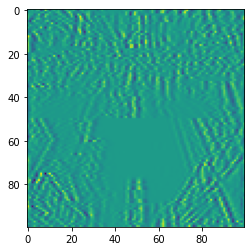

In [38]:
fileName = "broken_image_t.p"
# fileName2 = "broken_img.jpg"

broken_image = torch.FloatTensor(pickle.load(open(fileName, "rb"), encoding="latin1"))

plot.imshow(broken_image.view(100, 100))

## 이미지를 구리게 만든 주범

In [39]:
# 이 함수를 통해 위 사진처럼 이미지가 이상하게 변했다. 알고리즘을 알고 있을 경우 어떻게 복원시킬까?
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h


## 복원해보자

0회차 : 오차 : 12.346720695495605
1000회차 : 오차 : 1.1491261720657349
2000회차 : 오차 : 0.5481191873550415
3000회차 : 오차 : 0.38132861256599426
4000회차 : 오차 : 0.3008016049861908
5000회차 : 오차 : 0.2507879436016083
6000회차 : 오차 : 0.2149597555398941
7000회차 : 오차 : 0.18667080998420715
8000회차 : 오차 : 0.16279926896095276
9000회차 : 오차 : 0.1417292207479477
10000회차 : 오차 : 0.12254789471626282
11000회차 : 오차 : 0.10470248013734818
12000회차 : 오차 : 0.08783634752035141
13000회차 : 오차 : 0.07171129435300827
14000회차 : 오차 : 0.05616274103522301
15000회차 : 오차 : 0.04107626900076866
16000회차 : 오차 : 0.026373879984021187
17000회차 : 오차 : 0.02115938439965248
18000회차 : 오차 : 0.021166333928704262
19000회차 : 오차 : 0.02116772159934044
20000회차 : 오차 : 0.02116822823882103
21000회차 : 오차 : 0.02116699516773224
22000회차 : 오차 : 0.021167518571019173
23000회차 : 오차 : 0.021168285980820656
24000회차 : 오차 : 0.021160537376999855
25000회차 : 오차 : 0.021164126694202423
26000회차 : 오차 : 0.02116219326853752
27000회차 : 오차 : 0.021157585084438324
28000회차 : 오차 : 0.0211587306112051

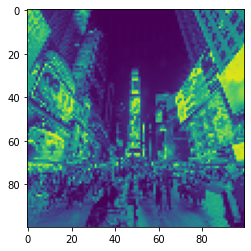

In [40]:
def distance_loss(hypothesis, broken_image): # hypothesis는 랜덤이미지를 weird_function을 돌려서 나온 결과
    return torch.dist(hypothesis, broken_image)


# 랜덤 텐서 생성(랜덤 이미지)
random_tensor = torch.randn(10000, dtype=torch.float)


# 경사하강법에 사용될 준비물(학습률)
lr = 0.8

# 경사하강법 구현

for i in range(0, 100000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    
    with torch.no_grad():
        random_tensor = random_tensor - lr * random_tensor.grad
        
    if i % 1000 == 0:
        print("{}회차 : 오차 : {}".format(i, loss.item()))
        
plot.imshow(random_tensor.view(100, 100).data)